In [1]:
import sys, glob, re, codecs, json, re, time, sys
from gensim import corpora, models, similarities, matutils

METADATA_FILE_NAME = 'EEBO_metadata.tsv'

MALLET_LABELS_FILE_NAME = '/home/data/all_3_prototype/all_eebo.mallet.text.LABELS.json'
MALLET_CORPUS_FILE_NAME = '/home/data/all_3_prototype/all_eebo.mallet.text.LDA_CORPUS'

def load_metadata():

    metadata = {}

    for line in codecs.open(METADATA_FILE_NAME, 'r', encoding='utf-8').read().split('\n'):
        if line.strip() > '' and len(line.strip().split('\t')) > 3:
            cols = line.strip().split('\t')
            
            metadata[cols[0]] = {'year': cols[1], 'author': cols[2], 'title': cols[3], 
                                 'subject': cols[4], 'phase': cols[6]}

    return metadata

def load_labels_json(file_name):

    file_name_labels = json.loads(codecs.open(file_name, 'r', encoding='utf-8').read())

    labels_hash = {}
    for n, f in enumerate(file_name_labels):
        labels_hash[f.split('.')[0]] = n

    return file_name_labels, labels_hash

In [2]:
metadata = load_metadata()

print
print metadata['A45126']
print metadata['A45126']['author']
print metadata['A45126']['title'][:50]
print


{'phase': u'2', 'title': u'A case of conscience whether a nonconformist, who hath not taken the Oxford Oath, may come to live at London, or at any corporate town, or within five miles of it, and yet be a good Christian : stated briefly, and published in reference to what is offered to the contrary, in a book intituled, A friendly debate betwixt a confirmist and a nonconformist : together with animadversions on a new book, entituled, Ecclesiastical polity, the general heads and substance whereof are taken under consideration : as also a peaceable dissertation, by way of composition with some late papers, entituled, Liberty of conscience, in order to the determining the magistrates power in matters of religion.', 'author': u'Humfrey, John, 1621-1719.', 'subject': u'Patrick, Simon, 1626-1707. --  Friendly debate between a conformist and a non-conformist.|Parker, Samuel, 1640-1688. --  Discourse of ecclesiastical politie.|Dissenters, Religious --  England --  Early works to 1800.|Church a

In [3]:
mallet_labels = load_labels_json(MALLET_LABELS_FILE_NAME)
mallet_corpus = corpora.MmCorpus(MALLET_CORPUS_FILE_NAME)

print 'len(metadata)', len(metadata)
print
print 'len(mallet_labels)', len(mallet_labels)
print 'len(mallet_labels[0])', len(mallet_labels[0])
print 'len(mallet_labels[1])', len(mallet_labels[1])
print 'len(mallet_corpus)', len(mallet_corpus)

len(metadata) 60327

len(mallet_labels) 2
len(mallet_labels[0]) 60312
len(mallet_labels[1]) 60312
len(mallet_corpus) 60312


In [20]:
matrix = matutils.corpus2dense(mallet_corpus, 200)
matrix = matrix.T

print
print matrix.shape
#print
#print mallet_corpus[0][:10]
print
print matrix[10][:10]
print
print matrix[11][:10]

(60312, 200)

[(0, 2.6205705378852054e-06), (1, 6.77873734489675e-07), (2, 1.735676309504136e-06), (3, 2.9575356671542082e-06), (4, 0.015899181851472766), (5, 5.206799883474624e-06), (6, 9.371675791710966e-07), (7, 4.218623673764659e-06), (8, 1.606335947431658e-06), (9, 3.422264842433647e-06)]

[2.4115581e-04 6.2380765e-05 1.5972416e-04 2.7216473e-04 1.4341972e-03
 4.7915141e-04 8.6242064e-05 3.8821533e-04 9.4578518e-03 3.1493107e-04]

[1.7426402e-05 4.5077591e-06 1.1541988e-05 1.9667170e-05 2.8359618e-02
 3.4624441e-05 6.2320241e-06 6.0576580e-02 1.0681893e-05 2.2757549e-05]


In [16]:
#from sklearn.random_projection import SparseRandomProjection
#from sklearn.random_projection import GaussianRandomProjection

#transformer = SparseRandomProjection(n_components=2, random_state=1)
#transformer = SparseRandomProjection(n_components=3, random_state=1)
#transformer = GaussianRandomProjection(n_components=2, random_state=1)

#matrix_new = transformer.fit_transform(matrix)

# ---------------------------------------------------

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
matrix_new = pca.fit_transform(matrix)

#print 'explained_variance_ratio_', pca.explained_variance_ratio_

tv = 0
for v in pca.explained_variance_ratio_:
    tv += v

print
print 'total variance', tv

# ---------------------------------------------------

print
print matrix_new.shape
#print
#print matrix_new[:3]


total variance 0.13254257664084435

(60312, 2)


In [17]:
x_column = matrix_new[:,0]
y_column = matrix_new[:,1]

x_column.sort()
y_column.sort()

print x_column[0], x_column[-1]
print y_column[0], y_column[-1]

low_dim = x_column[0]
if y_column[0] < low_dim:
    low_dim = y_column[0]

high_dim = x_column[-1]
if y_column[-1] > high_dim:
    high_dim = y_column[-1]
    
print
print 'low_dim', low_dim
print 'high_dim', high_dim


-0.14720343 0.64219105
-0.4351655 0.48130104

low_dim -0.4351655
high_dim 0.64219105


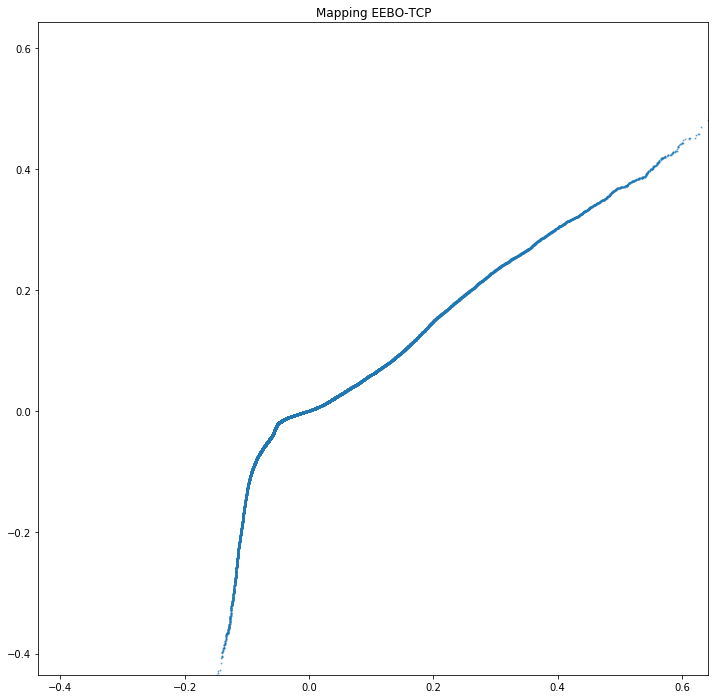

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

plt.title('Mapping EEBO-TCP')

x = []
y = []
for r in matrix_new:
    x.append(r[0])
    y.append(r[1])

plt.ylim(low_dim, high_dim)
plt.xlim(low_dim, high_dim)

plt.scatter(x, y, s=1, alpha=.5)